# Tree-based Models
The following notebooks explores tree-based models including Random Forest Regressor, XGBoost, and CatBoost and compares their performance on the study dataset.

## Setup

In [ ]:
# !pip install numpy pandas matplotlib seaborn scikit-learn xgboost bayesian-optimization tabpfn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
# !pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.1 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV


In [4]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

In [2]:
# Loading Dataset
# data = pd.read_csv("/content/drive/MyDrive/ECE324_Project/Model/dataset.csv") # change path for your env
data = pd.read_csv("dataset.csv") # change path for your env
data.head()

,Age,Gender,StudyTimeWeekly,Absences,Extracurricular,Sports,Music,Volunteering,GPA,ParentalInfluence,TutoringEffect
0,17,1,19.833723,7,0,0,1,0,2.929196,4,19.833723
1,18,0,15.408756,0,0,0,0,0,3.042915,1,0.000000
2,15,0,4.210570,26,0,0,0,0,0.112602,6,0.000000
3,17,1,10.028829,14,1,0,0,0,2.054218,9,0.000000
4,17,1,4.672495,17,0,0,0,0,1.288061,6,4.672495


In [3]:
# Data Splitting & Normalization
scaler = StandardScaler()
input = data.drop(columns=['GPA'], errors='ignore')
input = scaler.fit_transform(input)
labels = data['GPA']
X_train, X_test, Y_train, Y_test = train_test_split(input, labels)

## Random Forest

In [11]:
# Random Forest Regression
model_1 = RandomForestRegressor(n_estimators=20, random_state=42)
model_1.fit(X_train, Y_train)
Y_pred = model_1.predict(X_test)
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))

Mean Squared Error: 0.06893518214235307
Mean Absolute Error: 0.2106478654104936


## XGBoost

In [ ]:
# XGBoost
model_2 = XGBRegressor(n_estimators=20, random_state=42)
model_2.fit(X_train, Y_train)
Y_pred = model_2.predict(X_test)
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))

Mean Squared Error: 0.06219626759250058
Mean Absolute Error: 0.19632747769467218


In [26]:
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def xgb_cv(max_depth, learning_rate, n_estimators, gamma, min_child_weight):
    # Convert parameters that need to be integers.
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    # Set up the model with the given hyperparameters.
    params = {
        'max_depth': max_depth,
        'learning_rate': learning_rate,
        'n_estimators': n_estimators,
        'gamma': gamma,
        'min_child_weight': min_child_weight,
        'objective': 'reg:squarederror',
        'silent': True
    }
    model = xgb.XGBRegressor(**params)
    # Using negative mean squared error for cross-validation.
    cv_result = cross_val_score(model, X_train, Y_train, cv=5, scoring='neg_mean_squared_error').mean()
    return cv_result

# Define the range of hyperparameters to search.
params_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (50, 300),
    'gamma': (0, 5),
    'min_child_weight': (1, 10)
}

# Set up Bayesian Optimization.
optimizer = BayesianOptimization(
    f=xgb_cv,
    pbounds=params_bounds,
    random_state=42,
)

# Run the optimization.
optimizer.maximize(init_points=5, n_iter=10)

print("Best parameters:", optimizer.max)

|   iter    |  target   |   gamma   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | -0.07419  | 1.873     | 0.2857    | 8.124     | 6.388     | 89.0      |
| 2         | -0.0697   | 0.78      | 0.02684   | 9.063     | 6.41      | 227.0     |
| 3         | -0.07551  | 0.1029    | 0.2913    | 8.827     | 2.911     | 95.46     |
| 4         | -0.0699   | 0.917     | 0.09823   | 6.673     | 4.888     | 122.8     |
| 5         | -0.08198  | 3.059     | 0.05045   | 5.045     | 4.297     | 164.0     |
| 6         | -0.08333  | 3.62      | 0.155     | 6.994     | 7.416     | 244.4     |
| 7         | -0.07371  | 1.624     | 0.133     | 9.105     | 5.661     | 226.2     |
| 8         | -0.06858  | 0.4483    | 0.1105    | 9.192     | 5.783     | 229.0     |
| 9         | -0.06901  | 0.6087    | 0.121     | 8.359     | 9.431     | 230.0     |
| 10        | -0.06257  | 0.05631   | 0.1082    | 4.46

In [28]:
# New Model with tuned hyperparameters
best_params = optimizer.max['params']
best_params = {
    'max_depth': int(best_params['max_depth']),
    'learning_rate': best_params['learning_rate'],
    'n_estimators': int(best_params['n_estimators']),
    'gamma': best_params['gamma'],
    'min_child_weight': best_params['min_child_weight']
}

xgb_model = XGBRegressor(objective='reg:squarederror',
                                    random_state=42,
                                    **best_params)
xgb_model.fit(X_train, Y_train)

# prediction
Y2_pred = xgb_model.predict(X_test)

# evaluation
print('Mean Squared Error:', mean_squared_error(Y_test, Y2_pred))
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y2_pred))

Mean Squared Error: 0.054407370937888264
Mean Absolute Error: 0.18433481619715897


## CatBoost

In [31]:
# Catboost regressor
from catboost import CatBoostRegressor

# Train CatBoost
cat_model = CatBoostRegressor(random_state=42, verbose=0)
cat_model.fit(X_train, Y_train)
Y4_pred = cat_model.predict(X_test)

# evaluation
print('Mean Squared Error:', mean_squared_error(Y_test, Y4_pred))
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y4_pred))


Mean Squared Error: 0.0555457872904983
Mean Absolute Error: 0.1876040345465988


## Evaluation

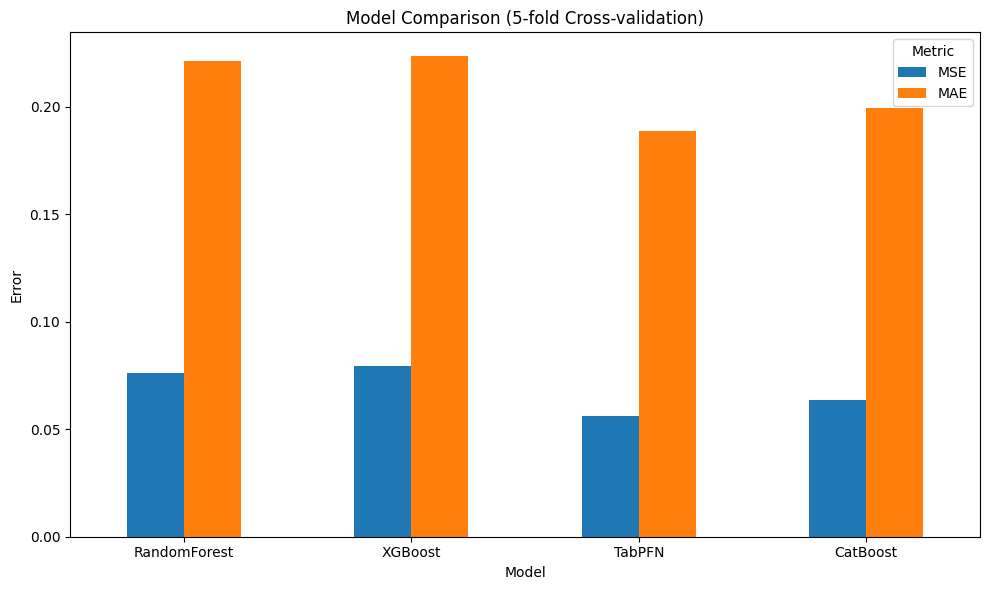

In [ ]:
# Overall Comparison
models = [
    ('RandomForest', RandomForestRegressor(random_state=42)),
    ('XGBoost', XGBRegressor(random_state=42)),
    ('CatBoost', CatBoostRegressor(random_state=42, verbose=0))
]

# Calculate scores
scoring_metrics = {
    'MSE': 'neg_mean_squared_error',
    'MAE': 'neg_mean_absolute_error'
}

all_scores = {}
for name, model in models:
    all_scores[name] = {}
    for metric_name, scoring in scoring_metrics.items():
        scores = cross_val_score(model, X_train, Y_train, cv=5, scoring=scoring, n_jobs=-1)
        # Invert scores for loss functions (neg_mean_squared_error, etc.)
        if scoring.startswith('neg_'):
            scores = -scores
        all_scores[name][metric_name] = scores.mean()

# Create DataFrame for plotting
df = pd.DataFrame(all_scores).T  # Transpose to have models as rows

# Plot results
ax = df.plot(kind='bar', figsize=(10, 6))
ax.set_title('Model Comparison (5-fold Cross-validation)')
ax.set_ylabel('Error')
ax.set_xlabel('Model')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend(title='Metric')
plt.tight_layout()
plt.show()